In [22]:
from scipy.stats import stats

import dl
from dl import util
from dl.oanda_keras import oanda_keras
from oanda_api import oanda_rest_api
from dl import oanda_keras as odl

In [2]:
from main import *

In [3]:
df_org = oanda_dataframe('USD_JPY_M1.csv')

In [4]:
in_out_neurons = 1
hidden_neurons = 300
batch_size=1000
epochs=1
validation_split=0.05

In [5]:
length_of_sequences = 5

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import LSTM
model = Sequential()

model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation('linear'))

model.compile(loss="mean_squared_error", optimizer="adam")

In [7]:
df = df_org

In [8]:
FEATURE_VALUE = ['close']

In [44]:
df[FEATURE_VALUE] = df[FEATURE_VALUE].rolling(window=3).mean()

In [45]:
df = df[df['date'].dt.minute % 3 == 0]

In [46]:
df = df.drop('date', axis=1)[FEATURE_VALUE]

In [47]:
df = df.dropna()

In [48]:
df = util.standard_0_1(df)

In [49]:
(X_train, y_train), (X_test, y_test) = util.train_test_split(df,test_size=0.1, n_prev=length_of_sequences)

In [59]:
print(X_train.del

<ipython-input-59-04922fee8c95>:2: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  xtrain = pd.Panel(X_train)


TypeError: Panel() takes no arguments

In [62]:
print(X_train[0:3])

[[[0.34723381]
  [0.34718083]
  [0.34716096]
  [0.34708812]
  [0.34706825]]

 [[0.34718083]
  [0.34716096]
  [0.34708812]
  [0.34706825]
  [0.34713448]]

 [[0.34716096]
  [0.34708812]
  [0.34706825]
  [0.34713448]
  [0.34710136]]]


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(
    X_train, y_train, 
    batch_size=100, #batch_size, 
    epochs=2,#epochs, 
    validation_split=validation_split, 
    callbacks=[early_stopping])

predicted = model.predict(X_test)

Train on 3031194 samples, validate on 159537 samples
Epoch 1/2
 299600/3031194 [=>............................] - ETA: 43:37 - loss: 5.6841e-07

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1304400/3031194 [===========>..................] - ETA: 27:38 - loss: 6.4785e-07

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2016600/3031194 [==================>...........] - ETA: 16:14 - loss: 6.2074e-07

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3031194/3031194 [==============================] - 2955s 975us/step - loss: 5.7960e-07 - val_loss: 1.1183e-08
Epoch 2/2
  41700/3031194 [..............................] - ETA: 47:54 - loss: 1.8213e-08

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  84600/3031194 [..............................] - ETA: 47:39 - loss: 1.9743e-07

In [ ]:
import pandas as pd
dataf = pd.DataFrame(predicted)
dataf.columns = ["predict"]
dataf["input"] = y_test

In [ ]:
fig(dataf.tail(100))

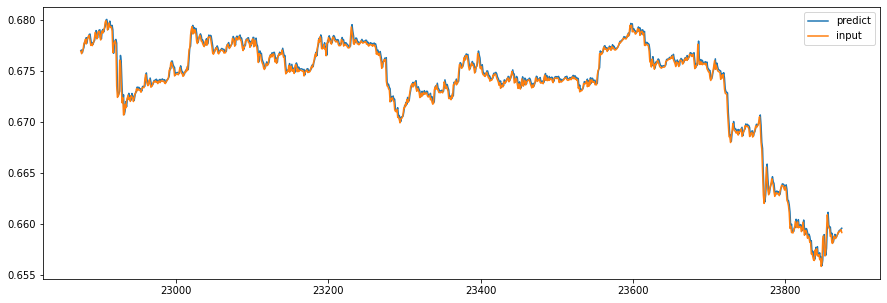

In [81]:
fig(dataf.tail(1000))

In [55]:
X_test, y_test, predicted,history = ok.odl(X_train,y_train,X_test,y_test)
import pandas as pd
dataf = pd.DataFrame(predicted)
dataf.columns = ["predict"]
dataf["input"] = y_test

Train on 74491 samples, validate on 3921 samples
Epoch 1/15
74491/74491 [==============================] - 40s 533us/step - loss: 1695.7232 - val_loss: 1.1369
Epoch 2/15
74491/74491 [==============================] - 39s 518us/step - loss: 3.4374 - val_loss: 1.0791
Epoch 3/15
74491/74491 [==============================] - 40s 530us/step - loss: 0.5865 - val_loss: 0.0238
Epoch 4/15
74491/74491 [==============================] - 40s 531us/step - loss: 0.0845 - val_loss: 0.0162
Epoch 5/15
74491/74491 [==============================] - 39s 520us/step - loss: 0.0358 - val_loss: 0.0154
Epoch 6/15
74491/74491 [==============================] - 39s 526us/step - loss: 0.0137 - val_loss: 0.0080
Epoch 7/15
74491/74491 [==============================] - 38s 515us/step - loss: 0.0103 - val_loss: 0.0038
Epoch 8/15
74491/74491 [==============================] - 38s 517us/step - loss: 0.0071 - val_loss: 0.0069
Epoch 9/15
74491/74491 [==============================] - 39s 521us/step - loss: 0.0074 - va

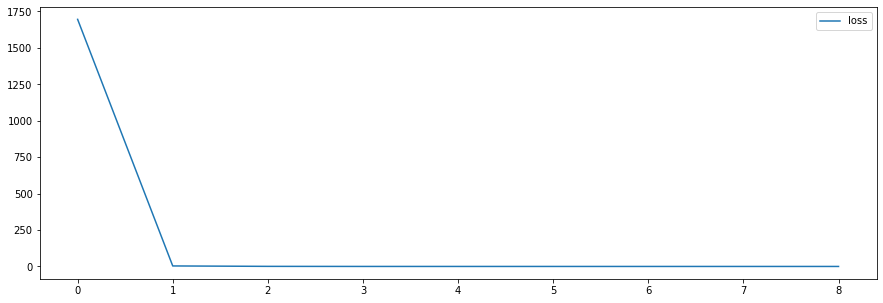

In [56]:
a = pd.DataFrame()
a['loss'] = pd.Series(history.history['loss'])
fig(a)

In [27]:
df = df.dropna()
df = df.tail(1000000)

In [15]:
df = df.rolling(window=5).mean().dropna()

In [22]:
hdf = df['close'].head(5)
print(hdf)
ldf = hdf
print(ldf.drop(0))
print(hdf.values)

0    108.651
1    108.751
2    108.756
3    108.761
4    108.758
Name: close, dtype: float64
1    108.751
2    108.756
3    108.761
4    108.758
Name: close, dtype: float64
[108.651 108.751 108.756 108.761 108.758]


In [4]:
df = df_org

In [19]:
g=df[FEATURE_VALUE].head(100)

In [20]:
display_charts(g,chart_type='stock')

In [40]:
g=g.T.values[0].tolist()

In [41]:
from highcharts import Highchart
H = Highchart()
H.add_data_set(g)
H